In [1]:
from sklearn import feature_extraction
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
sns.set()


In [2]:
f = open('obama_2011.txt')
doc = f.read()
doc = doc.lower()

In [3]:
#lower case
doc = doc.lower()
for sent in sent_tokenize(doc):
    # remove stop words
    filtered_words = [word for word in word_tokenize(sent) if word not in stopwords.words('english')]
    
    #remove punctation
    filtered_words = [word for word in filtered_words if word.isalnum()]


In [4]:
count_vec = CountVectorizer(stop_words='english')
count_occurs = count_vec.fit_transform([doc])
counts = count_occurs.toarray()
words = np.array(count_vec.get_feature_names_out())

In [5]:
words


array(['04', '08', '099', ..., 'young', 'zeal', 'zero'], dtype=object)

In [6]:
df = pd.DataFrame(counts).T
df.index = words
df.columns = ['count']
df.sort_values(by='count',ascending=False,inplace=True)
df.head(10)

,count
obama,615
jobs,36
romney,32
new,23
debt,23
plan,23
says,22
campaign,21
gop,21
budget,19


In [8]:
count_vec = CountVectorizer(stop_words='english',ngram_range=(2,2))
count_occurs = count_vec.fit_transform([doc])

counts = count_occurs.toarray()
words = np.array(count_vec.get_feature_names_out())

In [9]:
df = pd.DataFrame(counts).T
df.index = words
df.columns = ['count']
df.sort_values(by='count',ascending=False,inplace=True)
df.head(10)

,count
obama obama,22
obama says,11
obama campaign,10
obama speech,9
obama seeks,8
obama jobs,8
obama urges,8
obama presses,7
obama takes,7
obama offers,7


In [11]:
doc_split = []
for sent in sent_tokenize(doc):
    doc_split.append(sent)
doc_split=np.array(doc_split)   

In [12]:
count_vec = CountVectorizer(stop_words='english',max_features=4)
count_occurs = count_vec.fit_transform(doc_split)
counts_matrix = count_occurs.toarray()
words = np.array(count_vec.get_feature_names())

/Users/ruifangge/opt/anaconda3/envs/pyhton3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
df_matrix = pd.DataFrame(counts_matrix)
df_matrix.columns = words
df_matrix.index = ['sent. '+str(i) for i in np.arange(1,counts_matrix.shape[0]+1)]
df_total = df_matrix.sum(axis=0).to_frame().T
df_total.index = ['total']
df_matrix=pd.concat([df_matrix,df_total],axis=0)

In [14]:
df_matrix.sort_values(by='total',axis=1,ascending=False)

,obama,jobs,romney,new
sent. 1,1,0,0,0
sent. 2,1,0,0,0
sent. 3,1,0,0,0
sent. 4,1,0,0,1
sent. 5,1,0,0,0
...,...,...,...,...
sent. 599,1,0,0,0
sent. 600,1,0,0,0
sent. 601,1,0,0,0
sent. 602,1,0,1,1


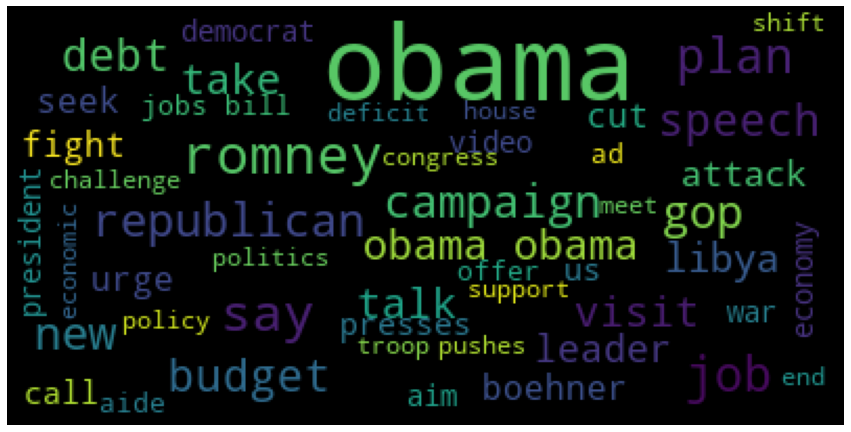

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',
                      stopwords=stopwords,
                      max_words=50,
                      max_font_size=50,
                      random_state=42).generate(str(doc_split))
fig = plt.figure(1,figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off');

In [16]:
lda = LatentDirichletAllocation(n_components=5,random_state=0)

In [17]:
n_top_words = 5
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,stop_words='english')

In [18]:
tf_matrix = tf_vectorizer.fit_transform(doc_split)

In [19]:
tf_df = pd.DataFrame(tf_matrix.toarray())
tf_feature_names = tf_vectorizer.get_feature_names_out()
tf_df.columns = tf_feature_names
tf_df

,10,11,12,2008,2012,abroad,act,action,ad,address,...,wisconsin,woes,world,worries,worse,year,years,york,young,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
lda.fit(tf_matrix) 

LatentDirichletAllocation(n_components=5, random_state=0)

In [21]:
df = pd.DataFrame(lda.components_)
df.columns = tf_feature_names
df

,10,11,12,2008,2012,abroad,act,action,ad,address,...,wisconsin,woes,world,worries,worse,year,years,york,young,zero
0,2.202274,0.200012,2.195423,0.200017,0.201524,0.200019,0.201363,3.204997,0.200266,0.200044,...,0.200032,0.204308,0.200024,0.200033,0.200010,2.199978,1.200568,0.200008,0.200018,0.200015
1,0.200013,0.200009,0.200029,0.200017,0.200012,0.200018,0.201246,0.200017,0.201040,3.205635,...,1.200761,1.197110,0.200023,1.201990,0.200009,0.200005,0.200014,0.200008,0.200017,0.200014
2,1.197685,0.200008,0.202715,1.199657,9.198438,1.199896,0.200023,0.200015,8.198672,1.201049,...,0.200029,0.200029,1.199730,1.197909,0.200010,0.200005,1.199392,0.200007,0.200016,0.200013
3,0.200013,3.199961,0.200028,0.200019,0.200013,0.200019,1.187130,1.194951,0.200011,1.191778,...,0.200031,1.198520,0.200022,0.200034,2.199960,0.200006,0.200012,3.199969,1.200780,3.202950
4,0.200015,0.200010,1.201805,1.200290,0.200013,1.200048,4.210239,0.200019,0.200011,1.201495,...,1.199146,0.200032,1.200200,0.200035,0.200011,0.200006,0.200014,0.200008,1.199168,1.197008


In [22]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(doc_split)
df = pd.DataFrame(tfidf_matrix.toarray())
tfid_feature_names = tfidf_vectorizer.get_feature_names_out()
df.columns = tfid_feature_names
df

,10,11,12,2008,2012,abroad,act,action,ad,address,...,wisconsin,woes,world,worries,worse,year,years,york,young,zero
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.597943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
600,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
lda.fit(tfidf_matrix) 

LatentDirichletAllocation(n_components=5, random_state=0)

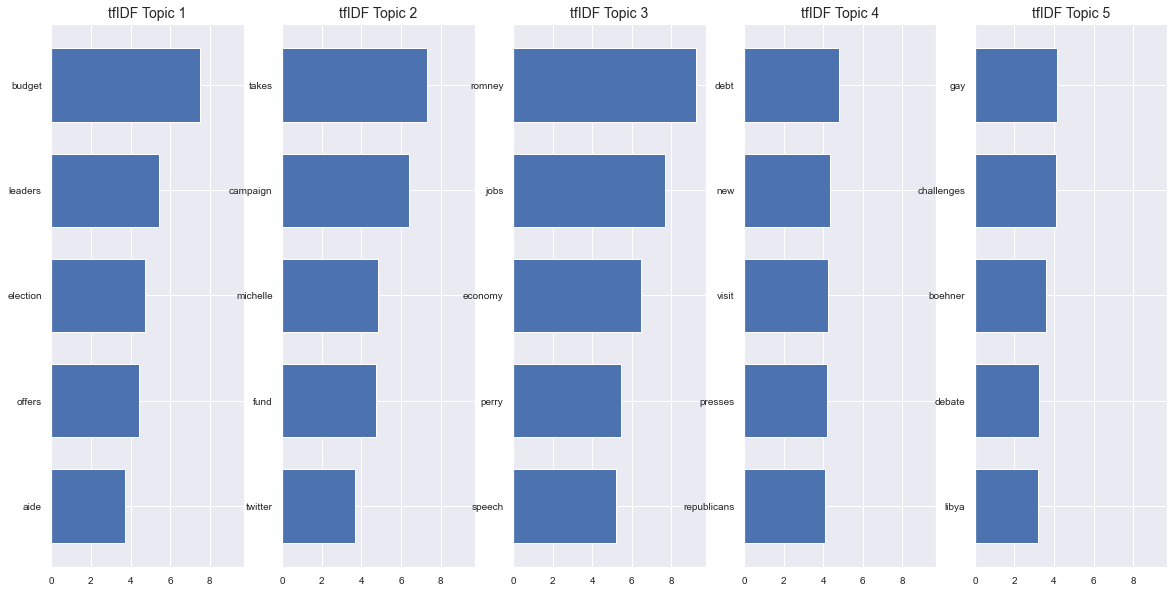

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(20, 10), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [tfid_feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'tfIDF Topic {topic_idx +1}',
                     fontdict={'fontsize': 14})
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)

In [27]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 4.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 98 kB 3.5 MB/s eta 0:00:011
     |████████████████████████████████| 829 kB 5.4 MB/s eta 0:00:01
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=7d6f4ef6c5f706f2e15076ed84a3ea0d36d9ceb8bf5abec43b1f3f6c3e4efc73
  Stored in directory: /Users/ruifangge/Library/Caches/pip/wheels/e9/95/74/4766157910829d2fbc6b913850a62cfd15da77a199302cdf9c
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=27b114a7d65548eb6e33b0ef74f9365f773ef69d3d74af21e163c4a85fabf63a
  Stored in directory: /Users/ruifangge/Library/Caches/pip/wheels/22/73/06/557dc4f4ef68179b9d763930d6eec26b88ed7c389b19588a1c
Successfully built pyLDAvis future
Note: you may need to restart

In [28]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tfidf_matrix,tfidf_vectorizer,mds='tsne')


/Users/ruifangge/opt/anaconda3/envs/pyhton3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/ruifangge/opt/anaconda3/envs/pyhton3.10/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Users/ruifangge/opt/anaconda3/envs/pyhton3.10/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/ruifangge/opt/anaconda3/envs/pyhton3.10/lib/python3.10/site-packages/past/builtins/misc

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  21.344969
1       51.163364 -159.968018       2        1  20.021404
0      -73.144554   21.523815       3        1  19.646197
3      -66.410133 -110.606438       4        1  19.611152
4       54.417324   12.443444       5        1  19.376277, topic_info=         Term      Freq     Total Category  logprob  loglift
414     takes  5.000000  5.000000  Default  30.0000  30.0000
63     budget  7.000000  7.000000  Default  29.0000  29.0000
131   economy  4.000000  4.000000  Default  28.0000  28.0000
70   campaign  7.000000  7.000000  Default  27.0000  27.0000
220   leaders  4.000000  4.000000  Default  26.0000  26.0000
..        ...       ...       ...      ...      ...      ...
108      debt  1.940785  7.153970   Topic5  -4.6127   0.3365
372      says  1.725708  7.265893   Topic5  -4.7301   0.2036
454     video  1.553929  5.724990   Topic5  -4.8350   0.3371
305    policy  1.363548  4.460433   Topic5  -4.9657   0.4560
429     tough  1.184764  3.115973   Topic5  -5.1062   0.6741

[261 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         3  0.633446       10
1         4  0.530924       11
4         1  0.824823     2012
6         4  0.866551      act
8         1  0.859730       ad
...     ...       ...      ...
475       4  0.595023   weiner
476       2  0.941325      win
480       1  0.655877  worries
481       5  0.633184    worse
484       4  0.566753     york

[296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4, 5])